# Importation des librairies 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#  2. Analyse exploratrice et visualisation 

In [4]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64



Nous avons aucune valeurs manquantes, ce qui est très bien .
On va commencer maintenant par la visualisation avec des graphes.




Text(0.5, 1.0, 'Distribution of Charges')

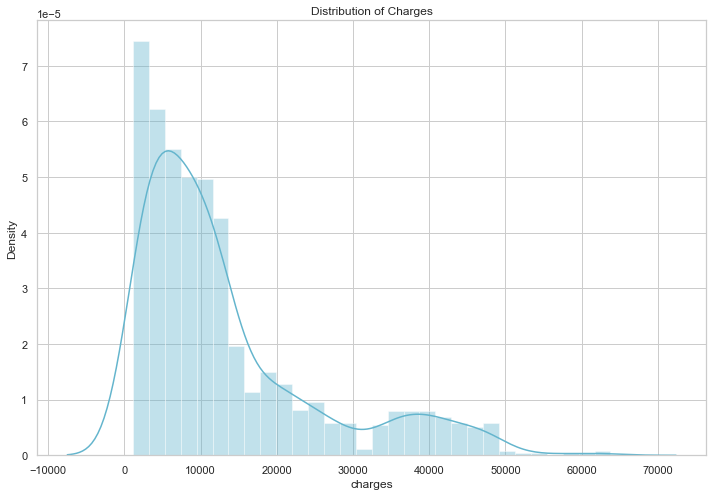

In [8]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')


Cette distribution est asymétrique à droite. Pour la rendre plus proche , nous pouvons appliquer le log .

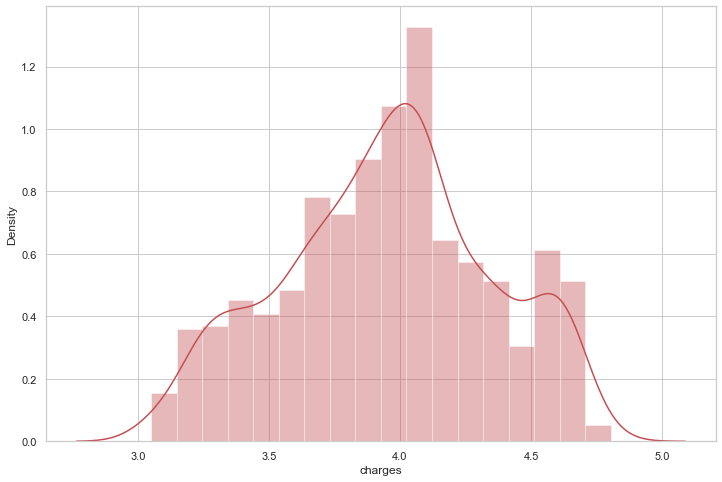

In [9]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

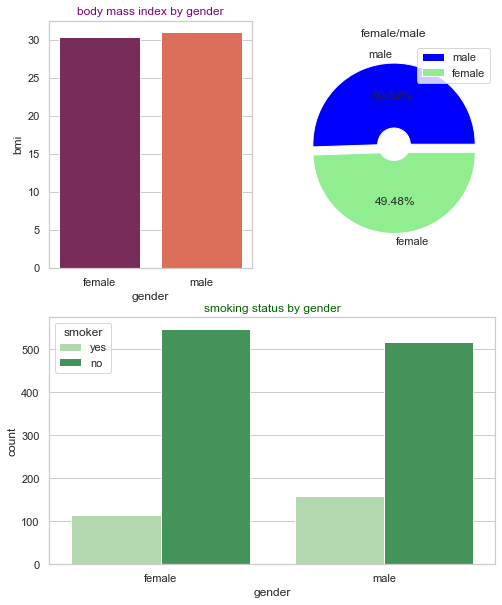

In [10]:
bodyMassIndex = []
genders = ["female", "male"]
for i in genders:
    sex = df[df["sex"] == i]
    bmi = sex["bmi"].mean()
    bodyMassIndex.append(bmi)
    
totalNumber = df.sex.value_counts().values
genderLabel = df.sex.value_counts().index
circle = plt.Circle((0,0),0.2,color = "white") 
explode = (0, 0.1)

plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.barplot(x = genders, y = bodyMassIndex, palette= "rocket")
plt.title("body mass index by gender", color = "purple")
plt.xlabel("gender")
plt.ylabel("bmi")
plt.subplot(2,2,2)
plt.pie(totalNumber, labels = genderLabel,autopct='%1.2f%%', explode = explode, colors=['blue','lightgreen'])
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("female/male")
plt.legend()
plt.subplot(2,2,(3,4))
sns.countplot(x = 'sex', hue = 'smoker', data = df, palette="Greens")
plt.title("smoking status by gender", color = "darkgreen")
plt.xlabel("gender")
plt.show()

. Dans le premier graphe, on examine l'effet du sexe sur l'IMC. Il ne semble pas y avoir beaucoup de différence.

. Dans le deuxième graphe, on examine la répartition par sexe.

. Dans le dernier graphique, on examine le statut tabagique selon le sexe. ils se ressemblent en tant qu'hommes et femmes.

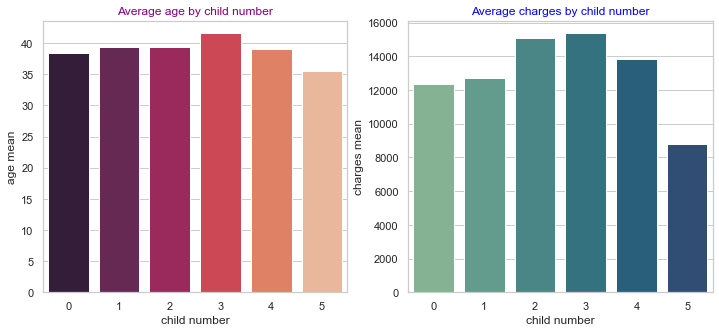

In [11]:
childNumber = []
childCharges = []
children = [0,1,2,3,4,5]

for each in children:
    child = df[df["children"] == each]
    xx = child["age"].mean()
    yy = child["charges"].mean()
    childNumber.append(xx)
    childCharges.append(yy)
    
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x = children, y = childNumber, palette= "rocket")
plt.title("Average age by child number", color = "purple")
plt.xlabel("child number")
plt.ylabel("age mean")
plt.subplot(1,2,2)
sns.barplot(x = children, y = childCharges, palette="crest")
plt.title("Average charges by child number", color = "blue")
plt.xlabel("child number")
plt.ylabel("charges mean")

plt.show()

Dans le deuxième graphe, on regarde l'effet du nombre d'enfants sur les charges. Ici, on voit que les charges par ceux qui ont 5 enfants est inférieur aux autres , ce qui semble bizarre mais intéressant . C'est pour cela , j'ai réalisé un petite recherche sur le sujet et il s'est avéré qu'une réduction se fait sur les grandes familles ce qui explique les ce taux faible par rapport aux autres. 

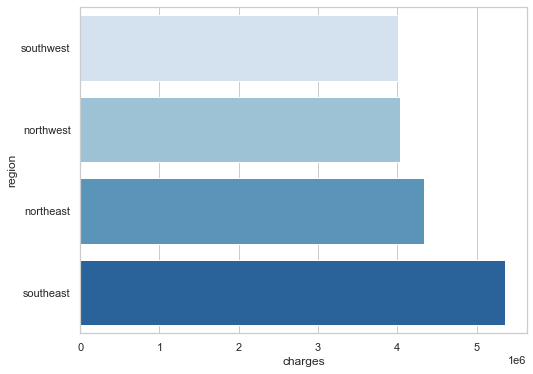

In [8]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

Les frais médicaux les plus élevés se trouvent dans le sud-est et les plus bas dans le sud-ouest.

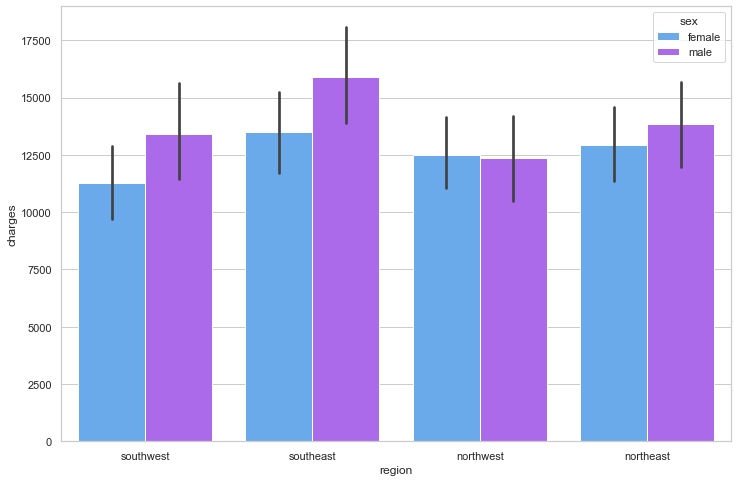

In [9]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

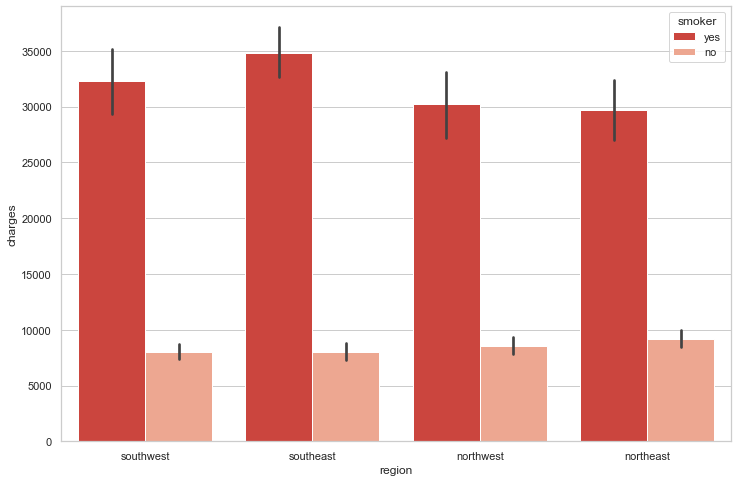

In [10]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

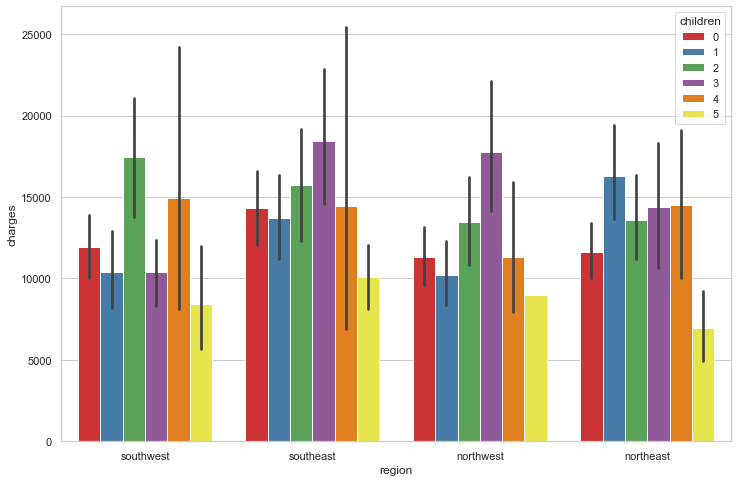

In [11]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

Comme nous pouvons le voir sur ces barplots, les charges les plus élevées dues au tabagisme se situent toujours dans le sud-est, mais les plus faibles se trouvent dans le nord-est. Les habitants du sud-ouest fument généralement plus que les habitants du nord-est, mais les habitants du nord-est ont des charges plus élevées selon le sexe que dans l'ensemble du sud-ouest et du nord-ouest. Et les personnes avec enfants ont également tendance à avoir des frais médicaux plus élevés.

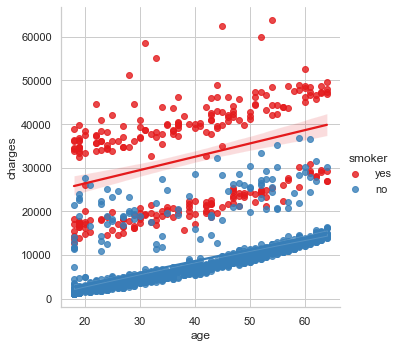

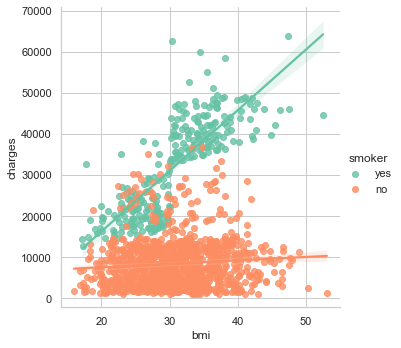

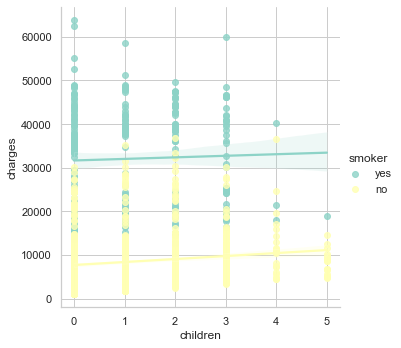

In [12]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

Le tabac a le plus grand impact sur les frais médicaux et  les personnes qui ont des enfants fument généralement moins, ce que montre le graphe suivant

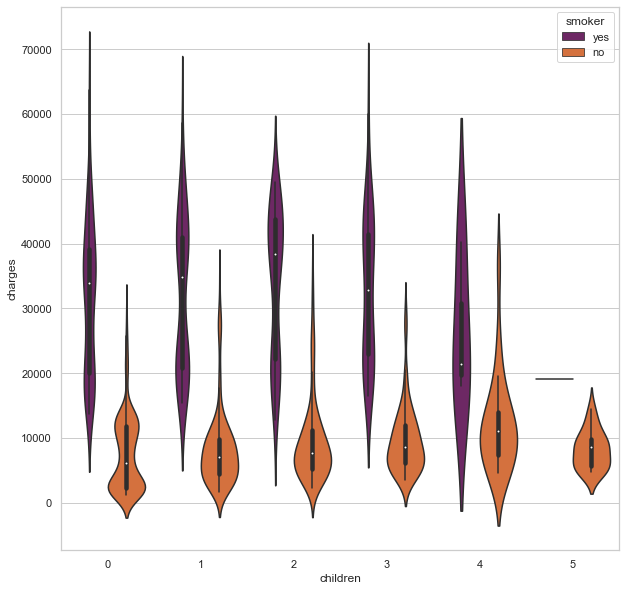

In [13]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

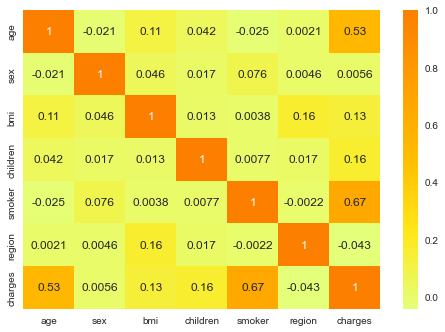

In [45]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

#  2. Feature Engineering

In [14]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

### Charges

mu charges : 13270.422265141257, sigma charges : 12105.484975561612


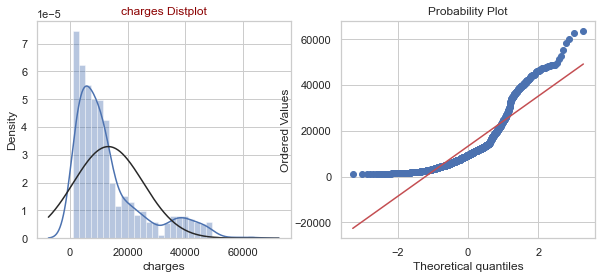

In [15]:
from scipy.stats import norm
from scipy import stats
(mu, sigma) = norm.fit(df["charges"])
print("mu {} : {}, sigma {} : {}".format("charges", mu, "charges", sigma))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["charges"], fit=norm)
plt.title("charges Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["charges"], plot = plt)
plt.show()


Lors de l'examination de la variable "charges" au niveau des chartes , on remarque que les données sont asymétriques ce qui comme étudié on statistiques va affecter notre modéle de prédiction . C'est pour cela qu'on doit fixer ce problème avant d'appliquer nos modéles . La solution est d'utiliser la fonction log1p de numpy qui retourne le logarithme naturel d'un tableau par élément .

mu charges : 9.098827980629359, sigma charges : 0.9190355163595243


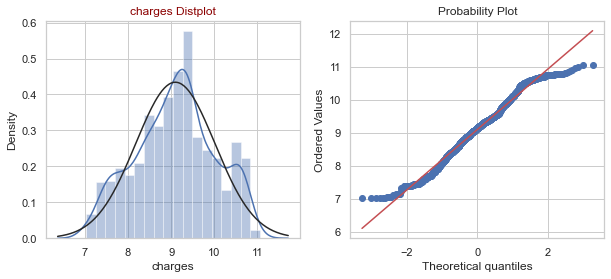

In [16]:
df["charges"] = np.log1p(df["charges"])
(mu, sigma) = norm.fit(df["charges"])
print("mu {} : {}, sigma {} : {}".format("charges", mu, "charges", sigma))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df["charges"], fit=norm)
plt.title("charges Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(df["charges"], plot = plt)
plt.show()

Comme on remarque au niveau des nouveaux graphes, le probléme est réglé . 


#  3. Modeling 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import PredictionError
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Train - Test  Split

In [18]:
y = df.charges
X = df.drop(["charges"], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("Y_train shape {}, len {}.".format(Y_train.shape,len(Y_train)))
print("Y_test shape {}, len {}.".format(Y_test.shape,len(Y_test)))

X_train shape (1070, 6), len 1070.
X_test shape (268, 6), len 268.
Y_train shape (1070,), len 1070.
Y_test shape (268,), len 268.


### Standard Scaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [20]:
result = []

### Linear Regression

In [21]:
multiple_linear = LinearRegression()
multiple_linear.fit(X_train, Y_train)
predict = multiple_linear.predict(X_test)
score = r2_score(Y_test,predict)
result.append(score)
print(" score --> ",score)
print(' MAE (Mean Absolute Error) -->', metrics.mean_absolute_error(Y_test, predict))
print('MAR (Mean Squared Error) -->', metrics.mean_squared_error(Y_test, predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, predict)))

 score -->  0.8221498959762854
 MAE (Mean Absolute Error) --> 0.26534606892944634
MAR (Mean Squared Error) --> 0.15269682771656287
Root Mean Squared Error --> 0.3907644145985697


In [22]:
df_linearRegression = pd.DataFrame({'Actual': Y_test, 'Predicted': predict})
df_linearRegression.head()

,Actual,Predicted
698,9.303580,9.277770
520,10.152594,9.102556
1144,9.172784,9.176895
908,9.627146,9.824551
559,7.406972,8.045248


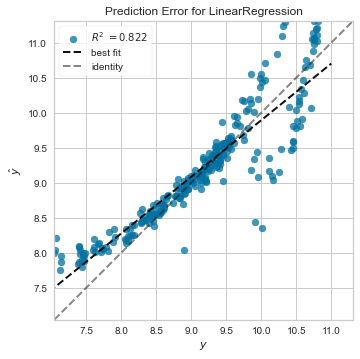

In [23]:
visualiser = PredictionError(multiple_linear)
visualiser.fit(X_train, Y_train)  
visualiser.score(X_test, Y_test)        
visualiser.show();

### Random Forest Regression  

In [24]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [25]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)
rf_predict = rf_random.predict(X_test)
score_rf = r2_score(Y_test,rf_predict)
result.append(score_rf)
print(" score --> ",score_rf)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, rf_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, rf_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, rf_predict)))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
 score -->  0.910192491498259
Mean Absolute Error --> 0.16255687690284013
Mean Squared Error --> 0.07710606484388433
Root Mean Squared Error --> 0.2776797883244013


In [26]:
df_RandomForestRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': rf_predict})
df_RandomForestRegressor.head()


,Actual,Predicted
698,9.303580,9.379425
520,10.152594,9.212858
1144,9.172784,9.338532
908,9.627146,9.842624
559,7.406972,7.531609


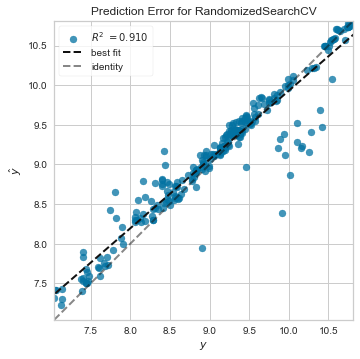

In [27]:
visualiser = PredictionError(rf_random)
visualiser.fit(X_train, Y_train)  
visualiser.score(X_test, Y_test)        
visualiser.show();

### XGB Regression

In [28]:
xgb =  XGBRegressor(max_depth = 2, learning_rate = .2)
xgb.fit(X_train,Y_train)
xgb_predict = xgb.predict(X_test)
score_xgb = r2_score(Y_test,xgb_predict)
result.append(score_xgb)
print(" score --> ",score_xgb)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, xgb_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, xgb_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, xgb_predict)))

 score -->  0.9139350678650837
Mean Absolute Error --> 0.17336518132777326
Mean Squared Error --> 0.07389279970784081
Root Mean Squared Error --> 0.27183230070733094


In [29]:
df_XGBRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': xgb_predict})
df_XGBRegressor.head()

,Actual,Predicted
698,9.303580,9.359593
520,10.152594,9.188699
1144,9.172784,9.270430
908,9.627146,9.656925
559,7.406972,7.754508


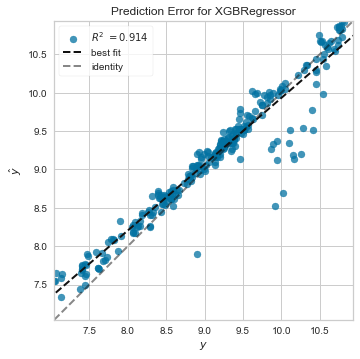

In [30]:
visualizer = PredictionError(xgb)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)        
visualizer.show();

### MLP Regression 

In [31]:
parameter_mlp = {
    'hidden_layer_sizes': [(50,50,50), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[400, 500],
}

In [32]:
model = MLPRegressor()
clf = GridSearchCV(model, parameter_mlp, n_jobs=-1, cv=3)
clf.fit(X_train,Y_train)
mlp_predict = clf.predict(X_test)
score_mlp = r2_score(Y_test,mlp_predict)
result.append(score_mlp)
print("r_square score --> ",score_mlp)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, mlp_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, mlp_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, mlp_predict)))

r_square score -->  0.9113086958371085
Mean Absolute Error --> 0.18345565474534342
Mean Squared Error --> 0.07614772488360488
Root Mean Squared Error --> 0.27594877220890995


In [33]:
df_MLPRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': mlp_predict})
df_MLPRegressor.head()

,Actual,Predicted
698,9.303580,9.375030
520,10.152594,9.179561
1144,9.172784,9.316516
908,9.627146,9.658907
559,7.406972,7.573482


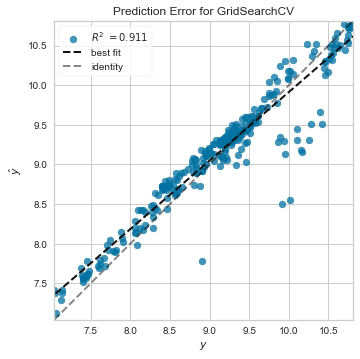

In [34]:
visualizer = PredictionError(clf)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)        
visualizer.show();

### KNN Regression

In [35]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)
knn_predict = knn.predict(X_test)
score_knn = r2_score(Y_test,knn_predict)
result.append(score_knn)
print("r_square score --> ",score_knn)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, knn_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, knn_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, knn_predict)))

r_square score -->  0.8941369705198278
Mean Absolute Error --> 0.1998289080918711
Mean Squared Error --> 0.09089085925938983
Root Mean Squared Error --> 0.3014811092910961


In [36]:
df_KNNRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': knn_predict})
df_KNNRegressor.head()

,Actual,Predicted
698,9.303580,9.283840
520,10.152594,9.493649
1144,9.172784,8.943938
908,9.627146,9.556467
559,7.406972,8.093638


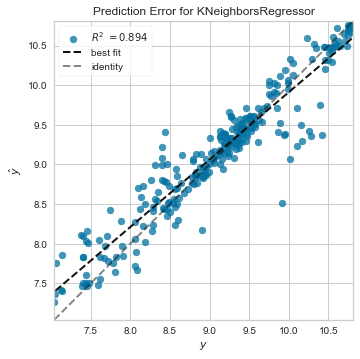

In [37]:
visualizer = PredictionError(knn)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)        
visualizer.show();

### Gradient Boosting Regression 

In [38]:
gbr = GradientBoostingRegressor(max_depth=3, random_state=42)
gbr.fit(X_train, Y_train)
gbr_predict = gbr.predict(X_test)
score_gbr = r2_score(Y_test,gbr_predict)
result.append(score_gbr)
print("r_square score --> ",score_gbr)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, gbr_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, gbr_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, gbr_predict)))

r_square score -->  0.9175452153290058
Mean Absolute Error --> 0.16467337728281264
Mean Squared Error --> 0.07079323410254658
Root Mean Squared Error --> 0.2660699797093738


In [39]:
df_GBRRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': gbr_predict})
df_GBRRegressor.head()

,Actual,Predicted
698,9.303580,9.372184
520,10.152594,9.172783
1144,9.172784,9.243150
908,9.627146,9.648251
559,7.406972,7.591521


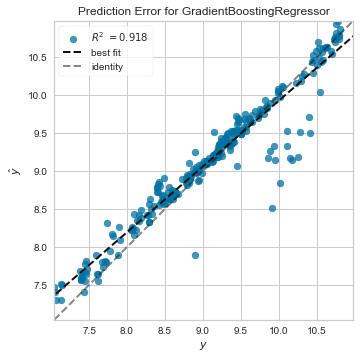

In [40]:
visualizer = PredictionError(gbr)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)        
visualizer.show();

### Results

In [41]:
df_result = pd.DataFrame({"Score":result, "ML Models":["LinearRegression","RandomForestRegression",
             "XGBRegression","MLPRegression","KNN Regression","Gradient Boosting Regression"]})


In [44]:
df_result

,Score,ML Models
0,0.822150,LinearRegression
1,0.910192,RandomForestRegression
2,0.913935,XGBRegression
3,0.911309,MLPRegression
4,0.894137,KNN Regression
5,0.917545,Gradient Boosting Regression


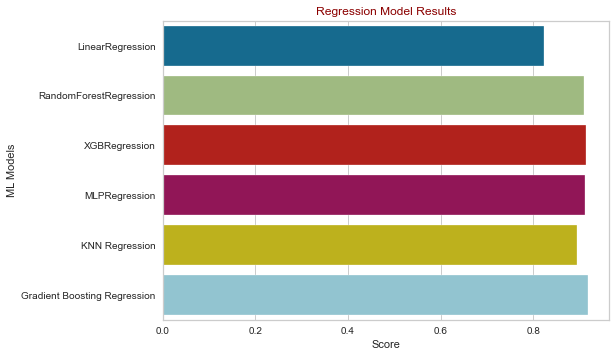

In [43]:
g = sns.barplot("Score", "ML Models", data = df_result)
g.set_xlabel("Score")
g.set_title("Regression Model Results", color = "darkred")
plt.show()

Comme indiqué dans le graphe , on remarque que le meilleur modèle est le Gradient Boosting Regression
avec le meilleur socre .